In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional


from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('AMZN.csv', parse_dates = ['Date'], 
  index_col="Date")
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3062300


In [3]:
df.shape

(5935, 6)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5.935000e+03
mean,417.010242,421.758467,411.709122,416.939467,416.939467,7.474755e+06
std,679.004617,686.455948,670.227947,678.586705,678.586705,7.236263e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.220001,38.885000,37.540624,38.205000,38.205000,3.681950e+06
50%,85.639999,87.459999,83.500000,85.500000,85.500000,5.625600e+06
75%,378.634995,383.630005,376.350007,380.680008,380.680008,8.453850e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.043292e+08


In [5]:
df[df.index >'2020-12-1'].shape

(8, 6)

In [6]:
import seaborn as sns

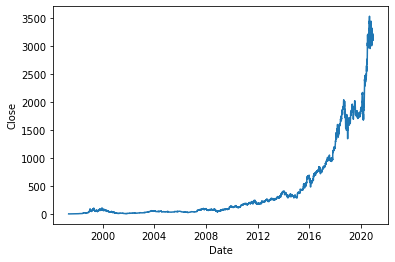

In [7]:
sns.lineplot(x=df.index, y="Close", data=df);

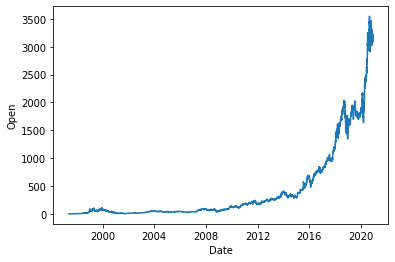

In [8]:
sns.lineplot(x=df.index,y="Open", data=df);

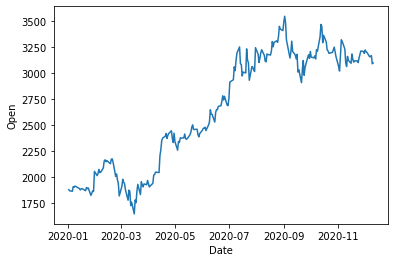

In [9]:
sns.lineplot(x=df[df.index >'2020-01-1'].index, y="Open", data=df[df.index >'2020-1-1']);

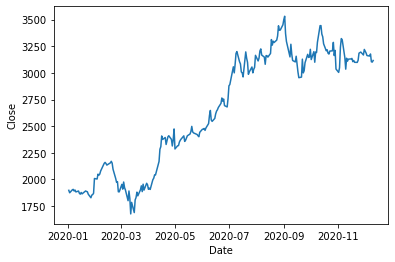

In [10]:
sns.lineplot(x=df[df.index >'2020-01-1'].index, y="Close", data=df[df.index >'2020-1-1']);

In [11]:
df.shape

(5935, 6)

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5.935000e+03
mean,417.010242,421.758467,411.709122,416.939467,416.939467,7.474755e+06
std,679.004617,686.455948,670.227947,678.586705,678.586705,7.236263e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.220001,38.885000,37.540624,38.205000,38.205000,3.681950e+06
50%,85.639999,87.459999,83.500000,85.500000,85.500000,5.625600e+06
75%,378.634995,383.630005,376.350007,380.680008,380.680008,8.453850e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.043292e+08


In [13]:
## Predict only according to closing price

In [14]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2020-12-07,3158.000000
2020-12-08,3177.290039
2020-12-09,3104.199951


In [15]:
#Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[1.95833300e+00],
       [1.72916700e+00],
       [1.70833300e+00],
       ...,
       [3.10419995e+03],
       [3.10148999e+03],
       [3.11641992e+03]])

In [16]:
dataset.shape

(5935, 1)

In [18]:
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

print(training_data_len, len(dataset))

4748 5935


In [31]:
data.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [56]:
data.tail()

,Close
Date,
2020-12-07,3158.000000
2020-12-08,3177.290039
2020-12-09,3104.199951
2020-12-10,3101.489990
2020-12-11,3116.419922


In [58]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.59345999e-04],
       [9.44274475e-05],
       [8.85255550e-05],
       ...,
       [8.78967861e-01],
       [8.78200179e-01],
       [8.82429556e-01]])

In [59]:
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
step_size = 60 # look into the past 60 values to estimate price

for i in range(step_size, len(train_data)):
    x_train.append(train_data[i-step_size:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((4688, 60), (4688,))

In [61]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4688, 60, 1)

In [62]:
## Model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [72]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50)

Epoch 1/50
293/293 [==============================] - 2s 8ms/step - loss: 1.2543e-05
Epoch 2/50
293/293 [==============================] - 2s 8ms/step - loss: 1.3112e-05
Epoch 3/50
293/293 [==============================] - 2s 8ms/step - loss: 1.1994e-05
Epoch 4/50
293/293 [==============================] - 2s 8ms/step - loss: 1.1897e-05
Epoch 5/50
293/293 [==============================] - 2s 8ms/step - loss: 1.1443e-05
Epoch 6/50
293/293 [==============================] - 2s 8ms/step - loss: 1.2358e-05
Epoch 7/50
293/293 [==============================] - 2s 8ms/step - loss: 1.1114e-05
Epoch 8/50
293/293 [==============================] - 2s 8ms/step - loss: 1.2654e-05
Epoch 9/50
293/293 [==============================] - 2s 8ms/step - loss: 1.2431e-05
Epoch 10/50
293/293 [==============================] - 2s 8ms/step - loss: 1.0887e-05
Epoch 11/50
293/293 [==============================] - 2s 8ms/step - loss: 1.1047e-05
Epoch 12/50
293/293 [==============================] - 2s 8ms/s

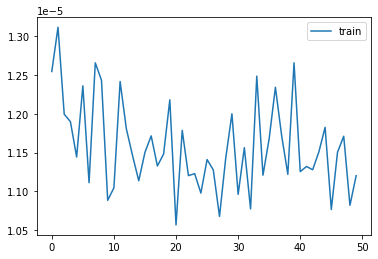

In [76]:
plt.plot(history.history['loss'], label='train')
plt.legend();

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history)
hist_df

In [78]:
history

### Create the testing data set


In [80]:
test_data = scaled_data[training_data_len - step_size: , :]
test_data.shape

(1247, 1)

In [82]:
len(data) - training_data_len + step_size

1247

In [85]:

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(step_size, len(test_data)):
    x_test.append(test_data[i-step_size:i, 0])
    
x_test = np.array(x_test)
x_test.shape, y_test.shape

((1187, 60), (1187, 1))

In [86]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(1187, 60, 1)

In [87]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [88]:
predictions

array([[ 588.9285],
       [ 595.1324],
       [ 591.862 ],
       ...,
       [3039.0015],
       [2985.9927],
       [2972.959 ]], dtype=float32)

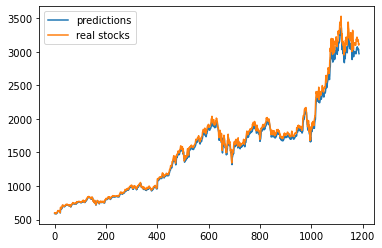

In [92]:
plt.plot(predictions, label='predictions')
plt.plot(y_test, label='real stocks')
plt.legend();

In [89]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

65.91453520053585


In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

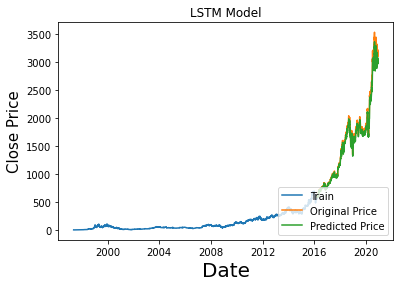

In [95]:
# Visualize the data
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Original Price', 'Predicted Price'], loc='lower right')
plt.show()

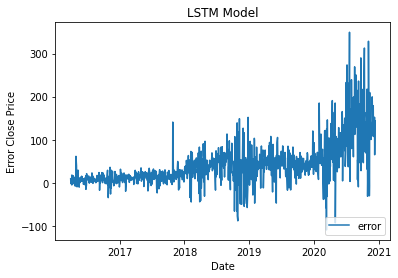

In [98]:
# Visualize the data
error = valid['Close'] - valid['Predictions']
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Error Close Price')
plt.plot(error)
plt.legend(['error'], loc='lower right')
plt.show()


    ##  Bidirectional

In [141]:
bimodel = Sequential()
bimodel.add(Bidirectional(LSTM(60, return_sequences=False, input_shape= (x_train.shape[1], 1))))
bimodel.add(Dropout(0.25))
bimodel.add(Dense(1))


bimodel.compile(optimizer='adam', loss='mean_squared_error')
history = bimodel.fit(x_train, y_train, batch_size = 128, validation_split = 0.1, epochs=25)

Epoch 1/25
33/33 [==============================] - 1s 44ms/step - loss: 2.8234e-04 - val_loss: 1.5251e-04
Epoch 2/25
33/33 [==============================] - 1s 31ms/step - loss: 2.5183e-05 - val_loss: 1.2931e-04
Epoch 3/25
33/33 [==============================] - 1s 31ms/step - loss: 1.8975e-05 - val_loss: 1.2997e-04
Epoch 4/25
33/33 [==============================] - 1s 31ms/step - loss: 1.7588e-05 - val_loss: 1.0123e-04
Epoch 5/25
33/33 [==============================] - 1s 31ms/step - loss: 1.4943e-05 - val_loss: 9.6111e-05
Epoch 6/25
33/33 [==============================] - 1s 32ms/step - loss: 1.3419e-05 - val_loss: 8.0964e-05
Epoch 7/25
33/33 [==============================] - 1s 32ms/step - loss: 1.4867e-05 - val_loss: 7.7538e-05
Epoch 8/25
33/33 [==============================] - 1s 32ms/step - loss: 1.3032e-05 - val_loss: 6.9408e-05
Epoch 9/25
33/33 [==============================] - 1s 31ms/step - loss: 1.1300e-05 - val_loss: 6.7183e-05
Epoch 10/25
33/33 [==================

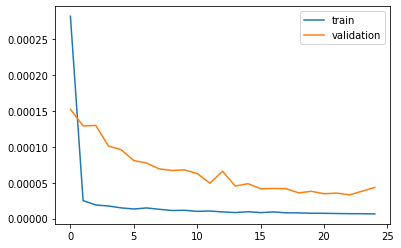

In [142]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [143]:
# Get the models predicted price values 
bilstmpredictions = bimodel.predict(x_test)
bilstmpredictions = scaler.inverse_transform(bilstmpredictions)

ValueError: non-broadcastable output operand with shape (1187,1) doesn't match the broadcast shape (1187,5)

In [ ]:
bilstmpredictions

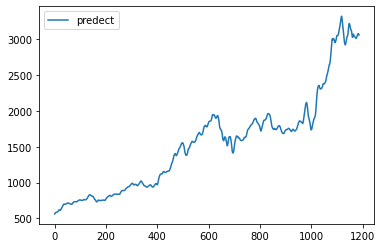

In [114]:
plt.plot(bilstmpredictions, label='predect')
plt.legend();

In [115]:
rmse = np.sqrt(np.mean(((bilstmpredictions - y_test) ** 2)))
print(rmse)

76.13210762855952


In [116]:
train = data[:training_data_len]
bilstmvalid = data[training_data_len:]
bilstmvalid['Predicted'] = bilstmpredictions

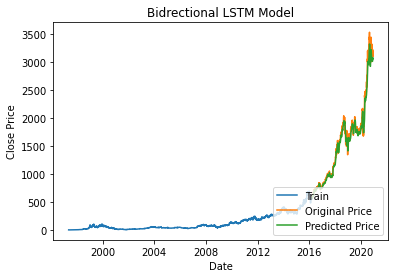

In [117]:
plt.title('Bidrectional LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(bilstmvalid[['Close', 'Predicted']])
plt.legend(['Train', 'Original Price', 'Predicted Price'], loc='lower right')
plt.show()

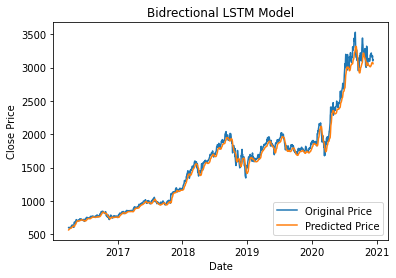

In [118]:
plt.title('Bidrectional LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(bilstmvalid[['Close', 'Predicted']])
plt.legend(['Original Price', 'Predicted Price'], loc='lower right')
plt.show()

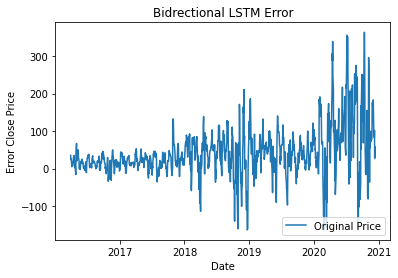

In [119]:
plt.title('Bidrectional LSTM Error')
plt.xlabel('Date')
plt.ylabel('Error Close Price')
plt.plot(bilstmvalid['Close'] - bilstmvalid['Predicted'])
plt.legend(['Original Price', 'Predicted Price'], loc='lower right')
plt.show()

## Predict with all attributes

In [19]:
df.shape

(5935, 6)

In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3062300


In [21]:
multiDataset = df.drop(['Adj Close'], axis = 1)
multiDataset

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,2751300
2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3286300
2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,4100800


In [22]:
multiDataset.shape

(5935, 5)

In [23]:
multi_scaler = MinMaxScaler(feature_range=(0,1))
multi_scaled_data = multi_scaler.fit_transform(multiDataset)

multi_scaled_data[-1], multi_scaled_data.shape

(array([0.87298599, 0.87789236, 0.88125536, 0.88242956, 0.02479825]),
 (5935, 5))

In [24]:
multiTrainData = multi_scaled_data[0:training_data_len, :]
step_size = 60
xx_train = []
yy_train = []

for i in range(step_size, len(multiTrainData)):
    xx_train.append(multiTrainData[i-step_size:i, :])
    yy_train.append(multiTrainData[i, :])
        
xx_train, yy_train = np.array(xx_train), np.array(yy_train)
xx_train.shape, yy_train.shape

((4688, 60, 5), (4688, 5))

In [25]:
xx_train.shape[2]

5

In [83]:
multibimodel = Sequential()
multibimodel.add(Bidirectional(LSTM(60, return_sequences=False, input_shape= (xx_train.shape[1], xx_train.shape[2]))))
multibimodel.add(Dropout(0.5))
multibimodel.add(Dense(1))


multibimodel.compile(optimizer='adam', loss='mean_squared_error')
history = multibimodel.fit(xx_train, yy_train, batch_size = 128, validation_split = 0.1, epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 43ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 2/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 3/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 6/50
33/33 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 7/50
33/33 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/50
33/33 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/50
33/33 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 11/

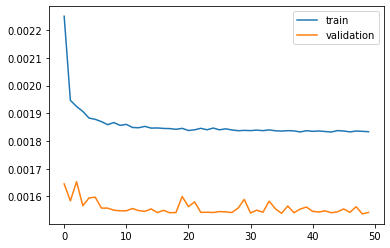

In [84]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [85]:
multiTest_data = multi_scaled_data[training_data_len - step_size: , :]
multiTest_data.shape

(1247, 5)

In [86]:
xx_test = []
yy_test = multi_scaled_data[training_data_len:, :]
for i in range(step_size, len(multiTest_data)):
    xx_test.append(multiTest_data[i-step_size:i, :])
    
xx_test = np.array(xx_test)
xx_test.shape, yy_test.shape

((1187, 60, 5), (1187, 5))

In [87]:
predictions = multibimodel.predict(xx_test)
predictions.shape

(1187, 1)

In [88]:
tmp = np.concatenate((predictions,predictions,predictions,predictions,predictions),axis=1) 
tmp.shape

(1187, 5)

In [89]:
predictions = multi_scaler.inverse_transform(tmp)
predictions = predictions[:, :1]
predictions

array([[ 495.5572 ],
       [ 496.47647],
       [ 494.77673],
       ...,
       [2462.3723 ],
       [2458.2915 ],
       [2444.4326 ]], dtype=float32)

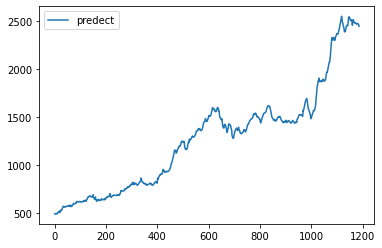

In [90]:
plt.plot(predictions, label='predect')
plt.legend();

In [91]:
rmse = np.sqrt(np.mean(((predictions - yy_test[:,:1]) ** 2)))
print(rmse)

1381.6279465580049


In [92]:
train = data[:training_data_len]
multiValid = data[training_data_len:]
multiValid['Predicted'] = predictions
multiValid

,Close,Predicted
Date,,
2016-03-30,598.690002,495.557190
2016-03-31,593.640015,496.476471
2016-04-01,598.500000,494.776733
2016-04-04,593.190002,495.940491
2016-04-05,586.140015,495.743317
...,...,...
2020-12-07,3158.000000,2470.962646
2020-12-08,3177.290039,2465.355957
2020-12-09,3104.199951,2462.372314


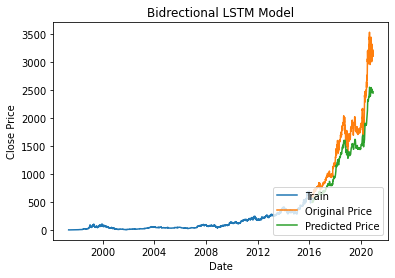

In [95]:
plt.title('Bidrectional LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(multiValid[['Close', 'Predicted']])
plt.legend(['Train', 'Original Price', 'Predicted Price'], loc='lower right')
plt.show()